In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [37]:
df = pd.read_csv(r'D:\Purwadhika\belajar aja\learning\capstone_3\data\data_travel_insurance_transform.csv',sep='|')
df.head()

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination
0,365,216.0,54.0,57,2,0,1,4,0,109
1,4,10.0,0.0,33,7,1,1,10,0,73
2,19,22.0,7.7,26,9,0,1,8,0,52
3,20,112.0,0.0,59,7,1,1,1,0,129
4,8,16.0,4.0,28,2,0,1,9,0,109


In [38]:
# Test Train Split
features = df.drop("Claim", axis =1) #membuat variabel features yang berisi semua kolom dari DataFrame df kecuali kolom "Claim". 
X_train, X_test, y_train, y_test = train_test_split(features,df["Claim"],test_size=0.30,random_state=10) 
print(f"X_train data is {X_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"X_test data is {X_test.shape}")
print(f"y_test data is {y_test.shape}")

X_train data is (27426, 9)
y_train data is (27426,)
X_test data is (11755, 9)
y_test data is (11755,)


fungsi X_train, X_test, y_train, y_test = train_test_split(features,df["Claim"],test_size=0.30,random_state=10)  <br><br>Fungsi train_test_split dari modul sklearn.model_selection untuk membagi data menjadi subset pelatihan (X_train dan y_train) dan subset pengujian (X_test dan y_test). Variabel features digunakan sebagai input untuk fitur-fitur, dan kolom "Claim" dari DataFrame df digunakan sebagai target. Argumen test_size=0.30 menentukan bahwa 30% dari data akan digunakan sebagai data pengujian, sedangkan 70% akan digunakan sebagai data pelatihan. Argumen random_state=10 digunakan untuk membuat pembagian data yang sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.

## Clasification with random forest

In [39]:
model = RandomForestClassifier() #memanggil modul random forest clasifier dari sklearn
model.fit(X_train, y_train)  # melakukan training menggunakan data dan kelas train
accuracy = model.score(X_test, y_test) # menampilkan skor akurasi dari model yang sudah dibuat
print(f"Accuracy of RandomForest Test Model ---> {accuracy}")

Accuracy of RandomForest Test Model ---> 0.9829859634198214


In [40]:
predictions_rf = model.predict(X_test) # melakukan prediksi dengan data test dari model yang sudah dilakukan
print("Classification Report:")
print(classification_report(y_test, predictions_rf)) # membuat clasification report dari data test dengan hasil prediksi data test

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11584
           1       0.03      0.01      0.01       171

    accuracy                           0.98     11755
   macro avg       0.51      0.50      0.50     11755
weighted avg       0.97      0.98      0.98     11755



## Decision Tree Classifier

In [41]:
model_dtc = DecisionTreeClassifier() #memanggil modul decision tree clasifier dari sklearn
model_dtc.fit(X_train, y_train) # melakukan training dengan menggunakan data train

DecisionTreeClassifier()

In [42]:
y_pred = model_dtc.predict(X_test) #melakukan predict dari data test dengan model yg sudah ditraining

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9663122075712463
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11584
           1       0.04      0.05      0.04       171

    accuracy                           0.97     11755
   macro avg       0.51      0.52      0.51     11755
weighted avg       0.97      0.97      0.97     11755



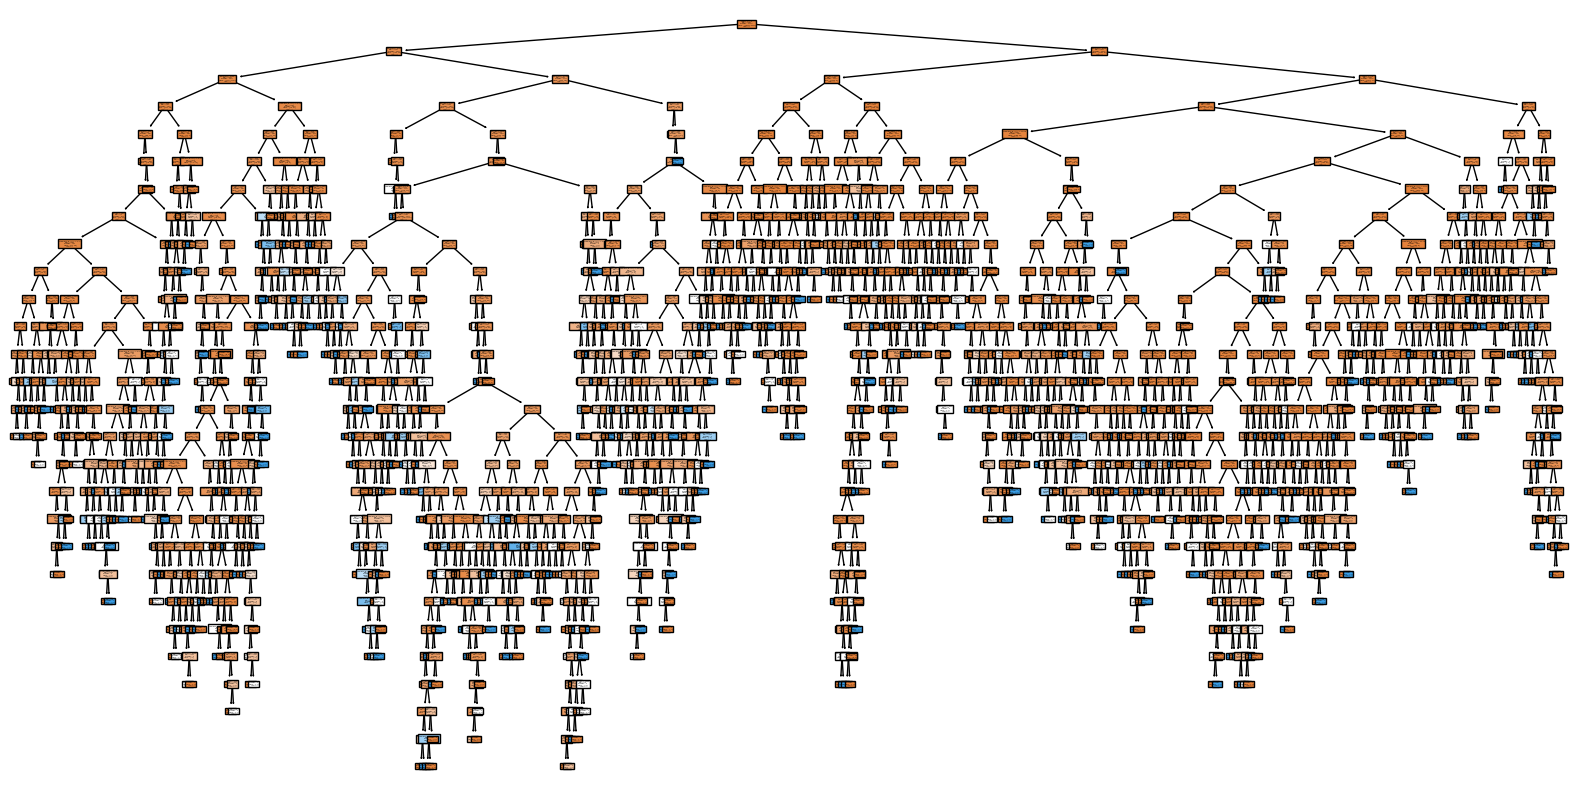

In [43]:
#gaperlu dijelaskan
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

x = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']]

class_names = [str(c) for c in model_dtc.classes_]


plt.figure(figsize=(20,10)) 
plot_tree(model_dtc, feature_names=x.columns, class_names=class_names, filled=True)
# plt.savefig(r'capstone_3\data\decision_tree_plot.png')
plt.savefig(r'D:\Purwadhika\belajar aja\learning\capstone_3\data\decision_tree_plot.png')
plt.show()

In [45]:
with open(r'D:\Purwadhika\belajar aja\learning\capstone_3\data\random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open(r'D:\Purwadhika\belajar aja\learning\capstone_3\data\decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model_dtc, file)